### 대학가 원룸 가격, 이대로 괜찮은가?
기숙사 수용능력이 서울 대학가 원룸 가격에 미치는 영향: 
회귀분석을 통한 연구

### 1. 데이터 EDA

In [2]:
import pandas as pd

# Excel 파일 읽어들이기
data = pd.read_excel('C:/Users/hyeseung/Desktop/4-2/경제자료분석/one_room_join_distance_min.xlsx')

# 데이터 출력
print(data)


       item_id  유형   보증금   월세            주소  관리비       평수 건물_형태  엘레베이터   룸_형태  \
0     38367177  월세  3000   55  서울시 서대문구 대신동  5.0  19.8300    원룸  False  오픈형원룸   
1     38223377  월세  1000   65  서울시 서대문구 대신동  7.0  16.5289    원룸   True  오픈형원룸   
2     38384199  월세  1000   65  서울시 서대문구 대신동  7.0  18.1800    원룸  False  오픈형원룸   
3     38511720  월세   500   75  서울시 서대문구 대신동  5.0  23.4700    원룸  False  오픈형원룸   
4     38513109  월세   500   75  서울시 서대문구 대신동  5.0  26.4500    원룸  False  오픈형원룸   
...        ...  ..   ...  ...           ...  ...      ...   ...    ...    ...   
2332  38485699  월세  2000   60   서울시 종로구 혜화동  2.0  33.0600    원룸  False  오픈형원룸   
2333  38488324  월세  2000   53   서울시 종로구 혜화동  9.0  28.7500    원룸   True  분리형원룸   
2334  38492631  월세  2000   60   서울시 종로구 혜화동  2.0  29.7500    원룸  False  분리형원룸   
2335  37994888  월세  5000  120   서울시 종로구 혜화동  5.0  55.9500    원룸  False  복층형원룸   
2336  38484024  월세  5000  120   서울시 종로구 혜화동  5.0  55.9500    원룸  False  복층형원룸   

      ...  편의점  버스정류장      

In [3]:
# Check the correlation between 월세, 보증금, and 수용가능인원
correlation_matrix = data[['보증금', '월세', '수용가능인원']].corr()

correlation_matrix[['보증금', '월세']]


,보증금,월세
보증금,1.000000,-0.080901
월세,-0.080901,1.000000
수용가능인원,-0.101060,-0.080447


In [4]:
# Check the descriptive statistics for 기숙사비, 수용가능인원, 보증금, and 월세
descriptive_stats_2 = data[['기숙사비', '수용가능인원', '보증금', '월세']].describe()
descriptive_stats_2


,기숙사비,수용가능인원,보증금,월세
count,2337.000000,2337.000000,2337.000000,2337.000000
mean,269.972579,4278.837398,1952.502353,55.397946
std,90.987671,2262.146538,2878.288481,31.850719
min,133.400000,1154.000000,10.000000,3.000000
25%,133.400000,2565.000000,500.000000,40.000000
50%,286.000000,3959.000000,1000.000000,50.000000
75%,344.275000,5972.000000,2000.000000,65.000000
max,409.250000,10000.000000,32000.000000,480.000000


In [5]:
# Check the correlation between 기숙사비, 수용가능인원, 보증금, and 월세
correlation_matrix_2 = data[['기숙사비', '수용가능인원', '보증금', '월세']].corr()

correlation_matrix_2


,기숙사비,수용가능인원,보증금,월세
기숙사비,1.000000,-0.327915,0.135349,0.152496
수용가능인원,-0.327915,1.000000,-0.101060,-0.080447
보증금,0.135349,-0.101060,1.000000,-0.080901
월세,0.152496,-0.080447,-0.080901,1.000000


In [6]:
#보증금과 월세 -> 전세로 환산하기 


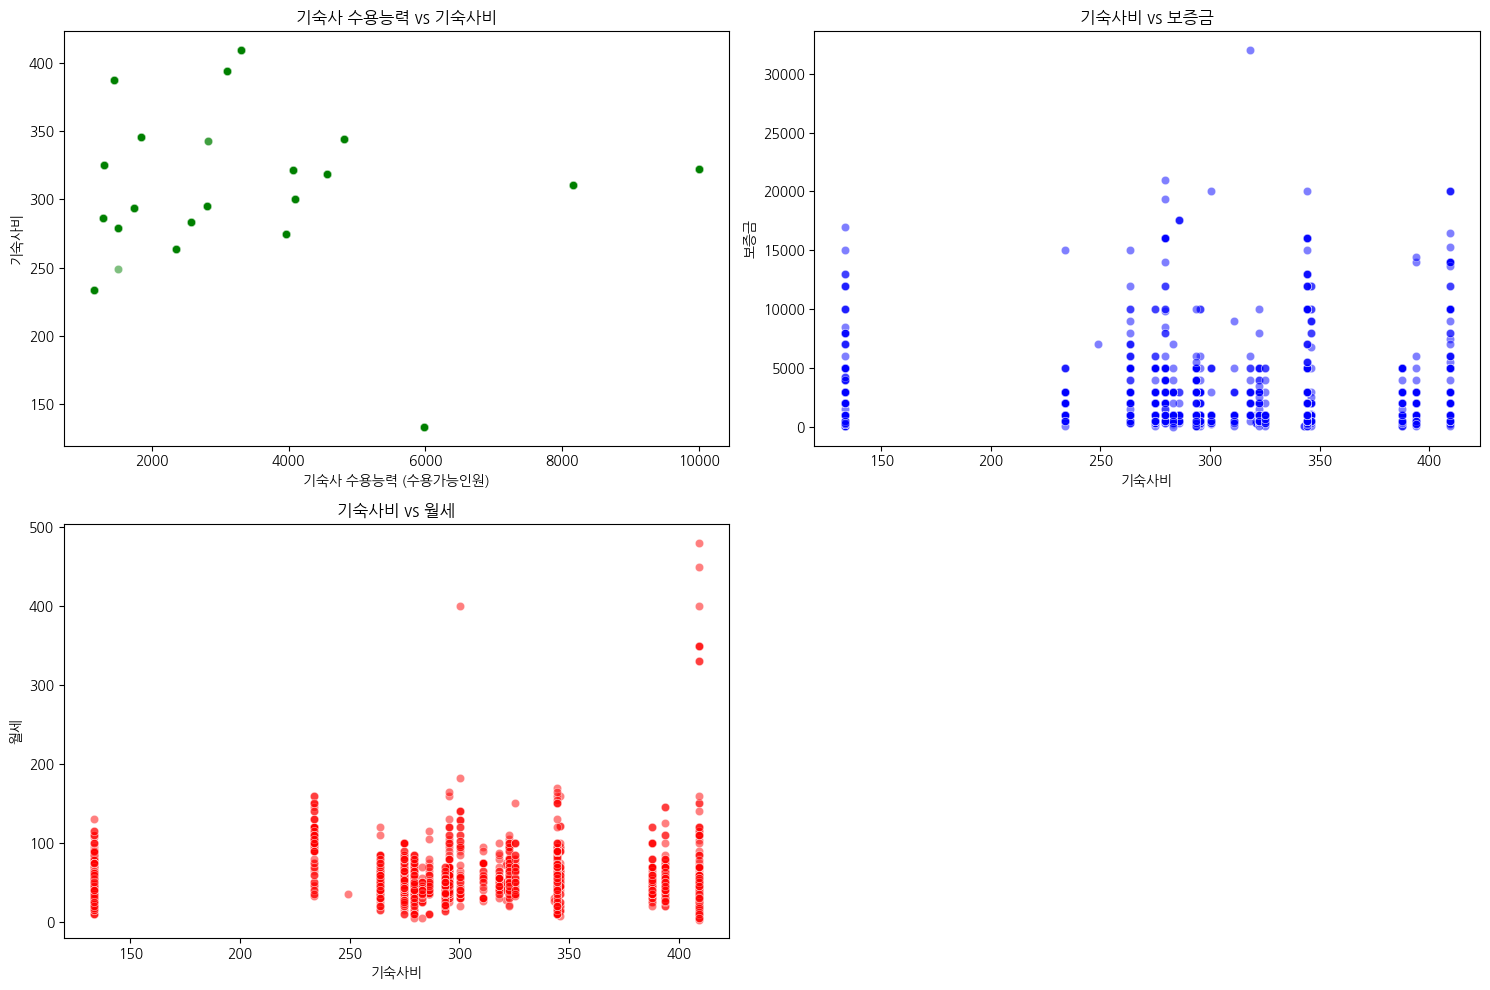

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot for 기숙사비 and 수용가능인원
sns.scatterplot(data=data, x='수용가능인원', y='기숙사비', ax=ax[0, 0], color='green', alpha=0.5)
ax[0, 0].set_title('기숙사 수용능력 vs 기숙사비')
ax[0, 0].set_xlabel('기숙사 수용능력 (수용가능인원)')
ax[0, 0].set_ylabel('기숙사비')

# Scatter plot for 기숙사비 and 보증금
sns.scatterplot(data=data, x='기숙사비', y='보증금', ax=ax[0, 1], color='blue', alpha=0.5)
ax[0, 1].set_title('기숙사비 vs 보증금')
ax[0, 1].set_xlabel('기숙사비')
ax[0, 1].set_ylabel('보증금')

# Scatter plot for 기숙사비 and 월세
sns.scatterplot(data=data, x='기숙사비', y='월세', ax=ax[1, 0], color='red', alpha=0.5)
ax[1, 0].set_title('기숙사비 vs 월세')
ax[1, 0].set_xlabel('기숙사비')
ax[1, 0].set_ylabel('월세')

# Hide the last subplot
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()


In [8]:
# Encode '주차여부' column: 주차 가능 -> 1, 주차 불가능 -> 0
data['주차여부'] = data['주차여부'].map({'주차 가능': 1, '주차 불가능': 0})

# Check the first few rows to confirm the encoding
data[['주차여부']].head()


,주차여부
0,0
1,0
2,0
3,0
4,0


In [9]:
data[['주차여부']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주차여부    2337 non-null   int64
dtypes: int64(1)
memory usage: 18.4 KB


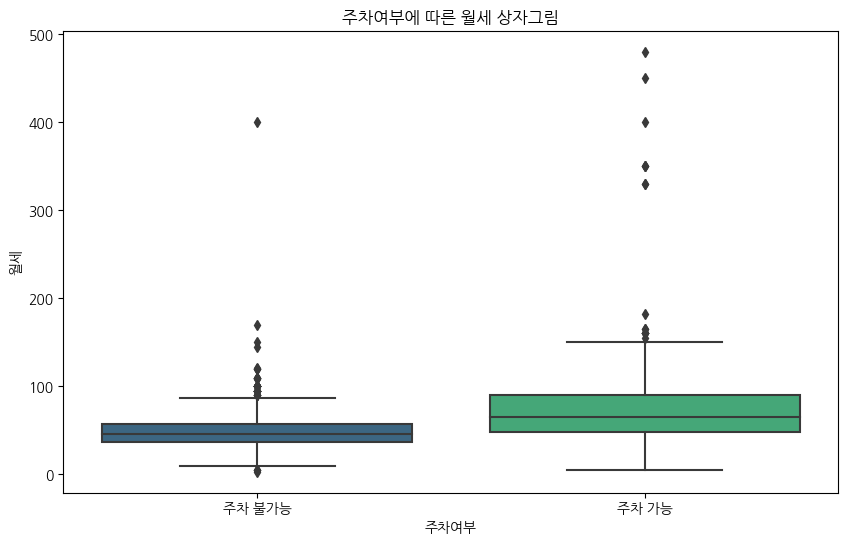

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of 월세 based on 주차여부
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='주차여부', y='월세', palette='viridis')

plt.title('주차여부에 따른 월세 상자그림')
plt.xlabel('주차여부')
plt.ylabel('월세')
plt.xticks([0, 1], ['주차 불가능', '주차 가능'])
plt.show()

In [11]:
# Encode '엘레베이터' column: TRUE -> 1, FALSE -> 0
data['엘레베이터'] = data['엘레베이터'].map({True: 1, False: 0})

# Check the first few rows to confirm the encoding
data[['엘레베이터']].head()


,엘레베이터
0,0
1,1
2,0
3,0
4,0


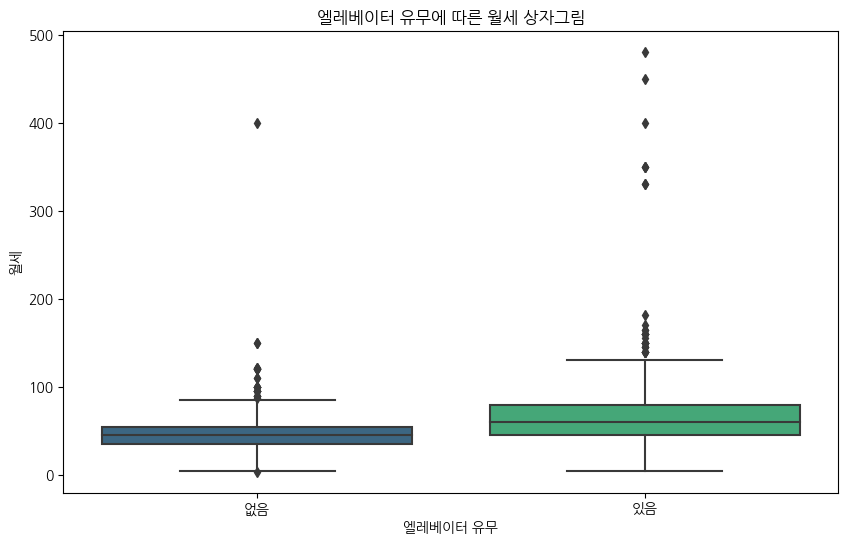

In [12]:
# Box plot of 월세 based on 엘레베이터
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='엘레베이터', y='월세', palette='viridis')

plt.title('엘레베이터 유무에 따른 월세 상자그림')
plt.xlabel('엘레베이터 유무')
plt.ylabel('월세')
plt.xticks([0, 1], ['없음', '있음'])
plt.show()

In [13]:
# Save the processed data to a new Excel file
file_path = "processed_data.xlsx"
data.to_excel(file_path, index=False)

file_path

'processed_data.xlsx'

In [14]:
# Create a new column '전세금' using the given formula
data['전세금'] = (data['월세'] * 12 * 100) / 5 + data['보증금']

# Check the first few rows to confirm the new column
data[['전세금']].head()

,전세금
0,16200.0
1,16600.0
2,16600.0
3,18500.0
4,18500.0


In [15]:
# Calculate the correlation between 전세금, 기숙사비 and other variables
correlation_matrix_3 = data[['전세금', '기숙사비', '보증금', '월세', '주차여부', '엘레베이터', '수용가능인원']].corr()

correlation_matrix_3


,전세금,기숙사비,보증금,월세,주차여부,엘레베이터,수용가능인원
전세금,1.000000,0.195702,0.284361,0.932570,0.403124,0.359553,-0.113982
기숙사비,0.195702,1.000000,0.135349,0.152496,-0.113543,-0.214036,-0.327915
보증금,0.284361,0.135349,1.000000,-0.080901,0.212904,0.160333,-0.101060
월세,0.932570,0.152496,-0.080901,1.000000,0.338939,0.313435,-0.080447
주차여부,0.403124,-0.113543,0.212904,0.338939,1.000000,0.475575,0.024690
엘레베이터,0.359553,-0.214036,0.160333,0.313435,0.475575,1.000000,0.105489
수용가능인원,-0.113982,-0.327915,-0.101060,-0.080447,0.024690,0.105489,1.000000


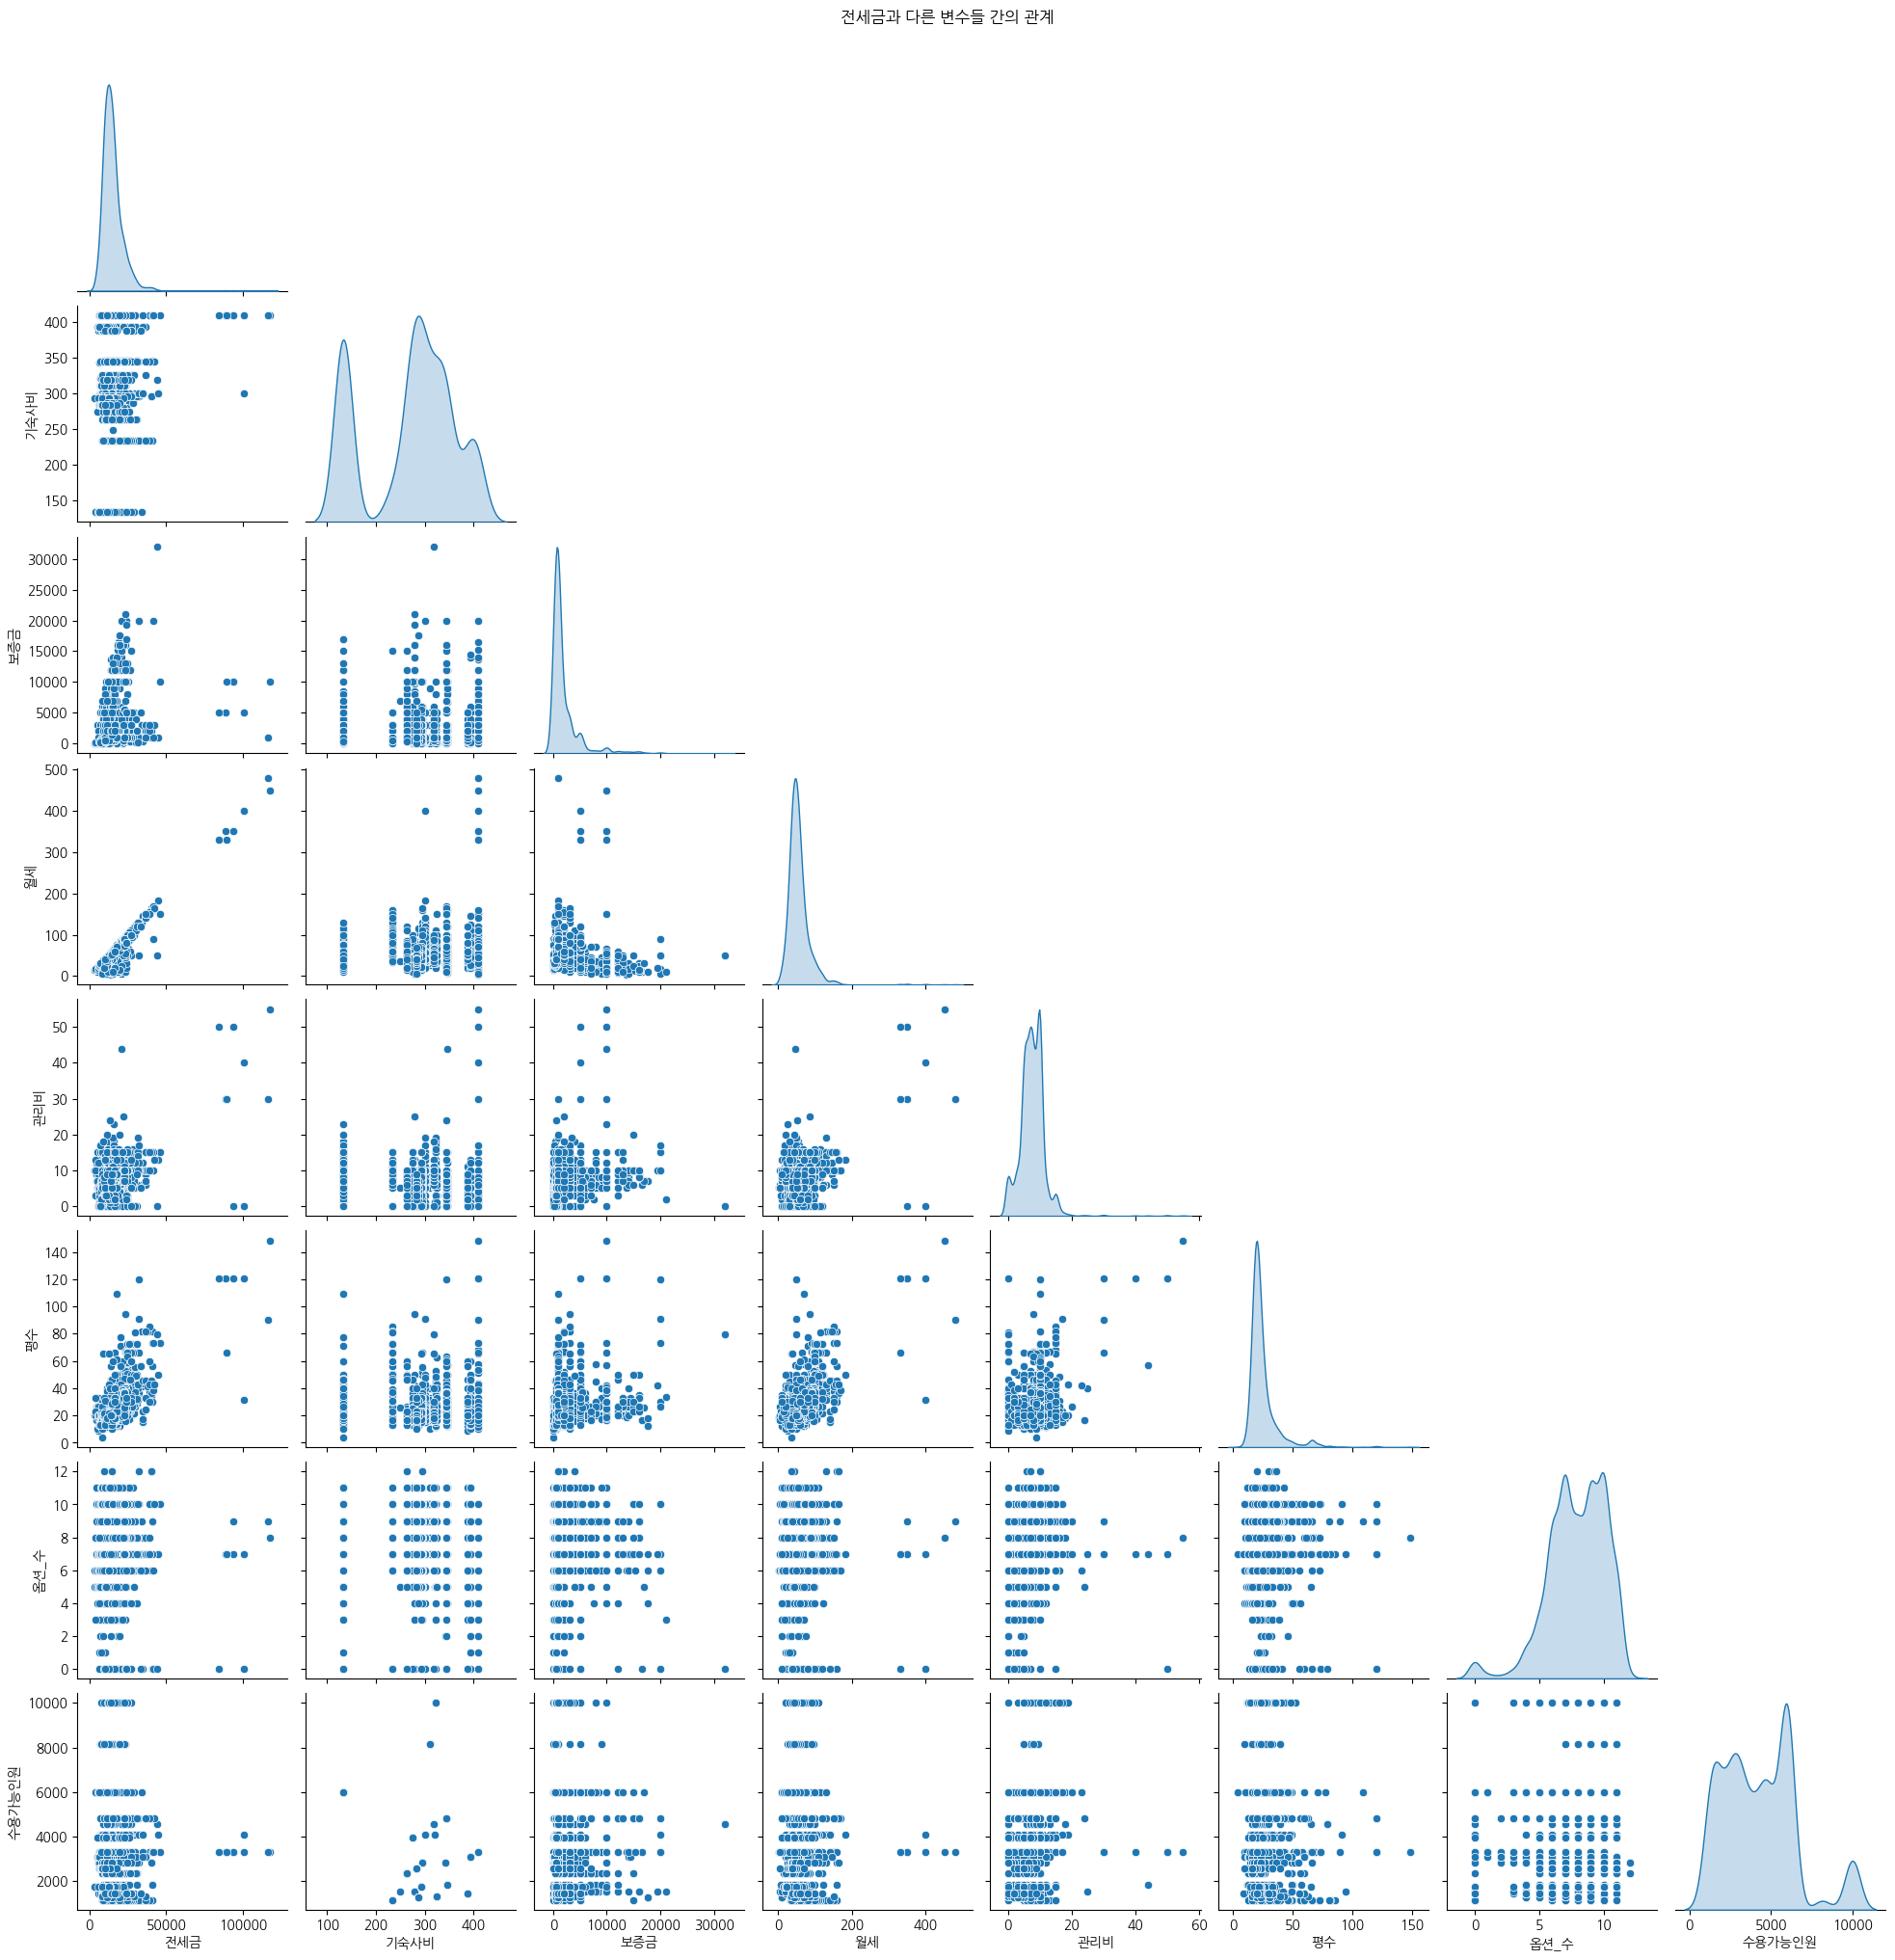

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the relationships using pairplot for selected columns
selected_columns = ['전세금', '기숙사비', '보증금', '월세','관리비','평수' ,'옵션_수', '수용가능인원']
sns.pairplot(data[selected_columns], corner=True, diag_kind="kde")
plt.suptitle('전세금과 다른 변수들 간의 관계', y=1.02)
plt.show()


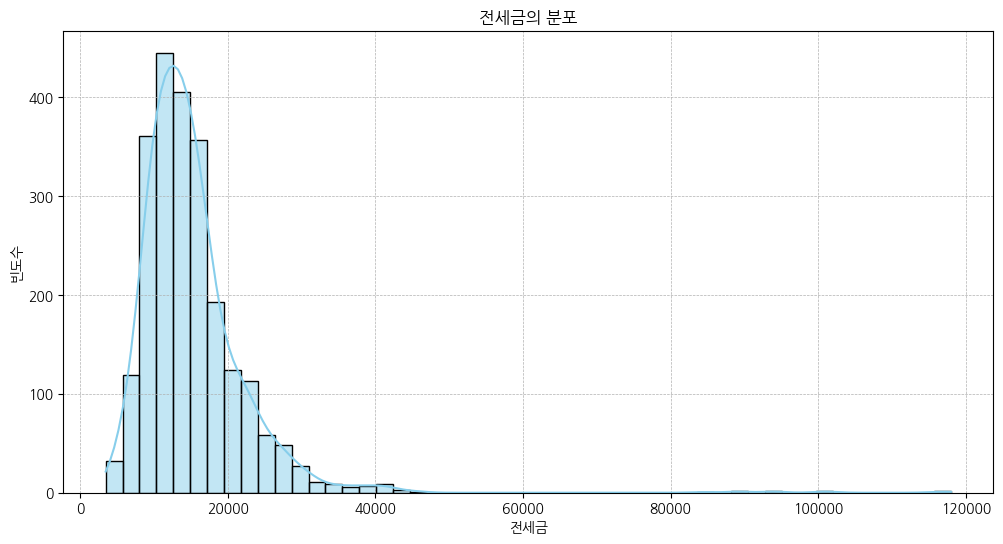

count      2337.000000
mean      15248.009414
std        7947.197270
min        3460.000000
25%       10820.000000
50%       13800.000000
75%       17600.000000
max      118000.000000
Name: 전세금, dtype: float64

In [17]:
# Descriptive statistics for 전세금
전세금_descriptive = data['전세금'].describe()

# Plotting distribution of 전세금
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(data['전세금'], kde=True, bins=50, color='skyblue')
plt.title('전세금의 분포')
plt.xlabel('전세금')
plt.ylabel('빈도수')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

전세금_descriptive


In [18]:
# Extract '시' and '구' from the 주소 column
data['지역'] = data['주소'].str.extract(r'(\S+시 \S+구)')

# Group by the extracted 지역 and calculate the mean for 월세, 보증금, 전세금
grouped_data = data.groupby('지역')[['월세', '보증금', '전세금']].mean().reset_index()

grouped_data.head()


,지역,월세,보증금,전세금
0,서울시 관악구,46.975450,1434.828151,12708.936170
1,서울시 광진구,61.171937,3337.944664,18019.209486
2,서울시 노원구,37.197674,1054.767442,9982.209302
3,서울시 동대문구,64.035545,1397.329384,16765.860190
4,서울시 동작구,45.719697,2083.030303,13055.757576


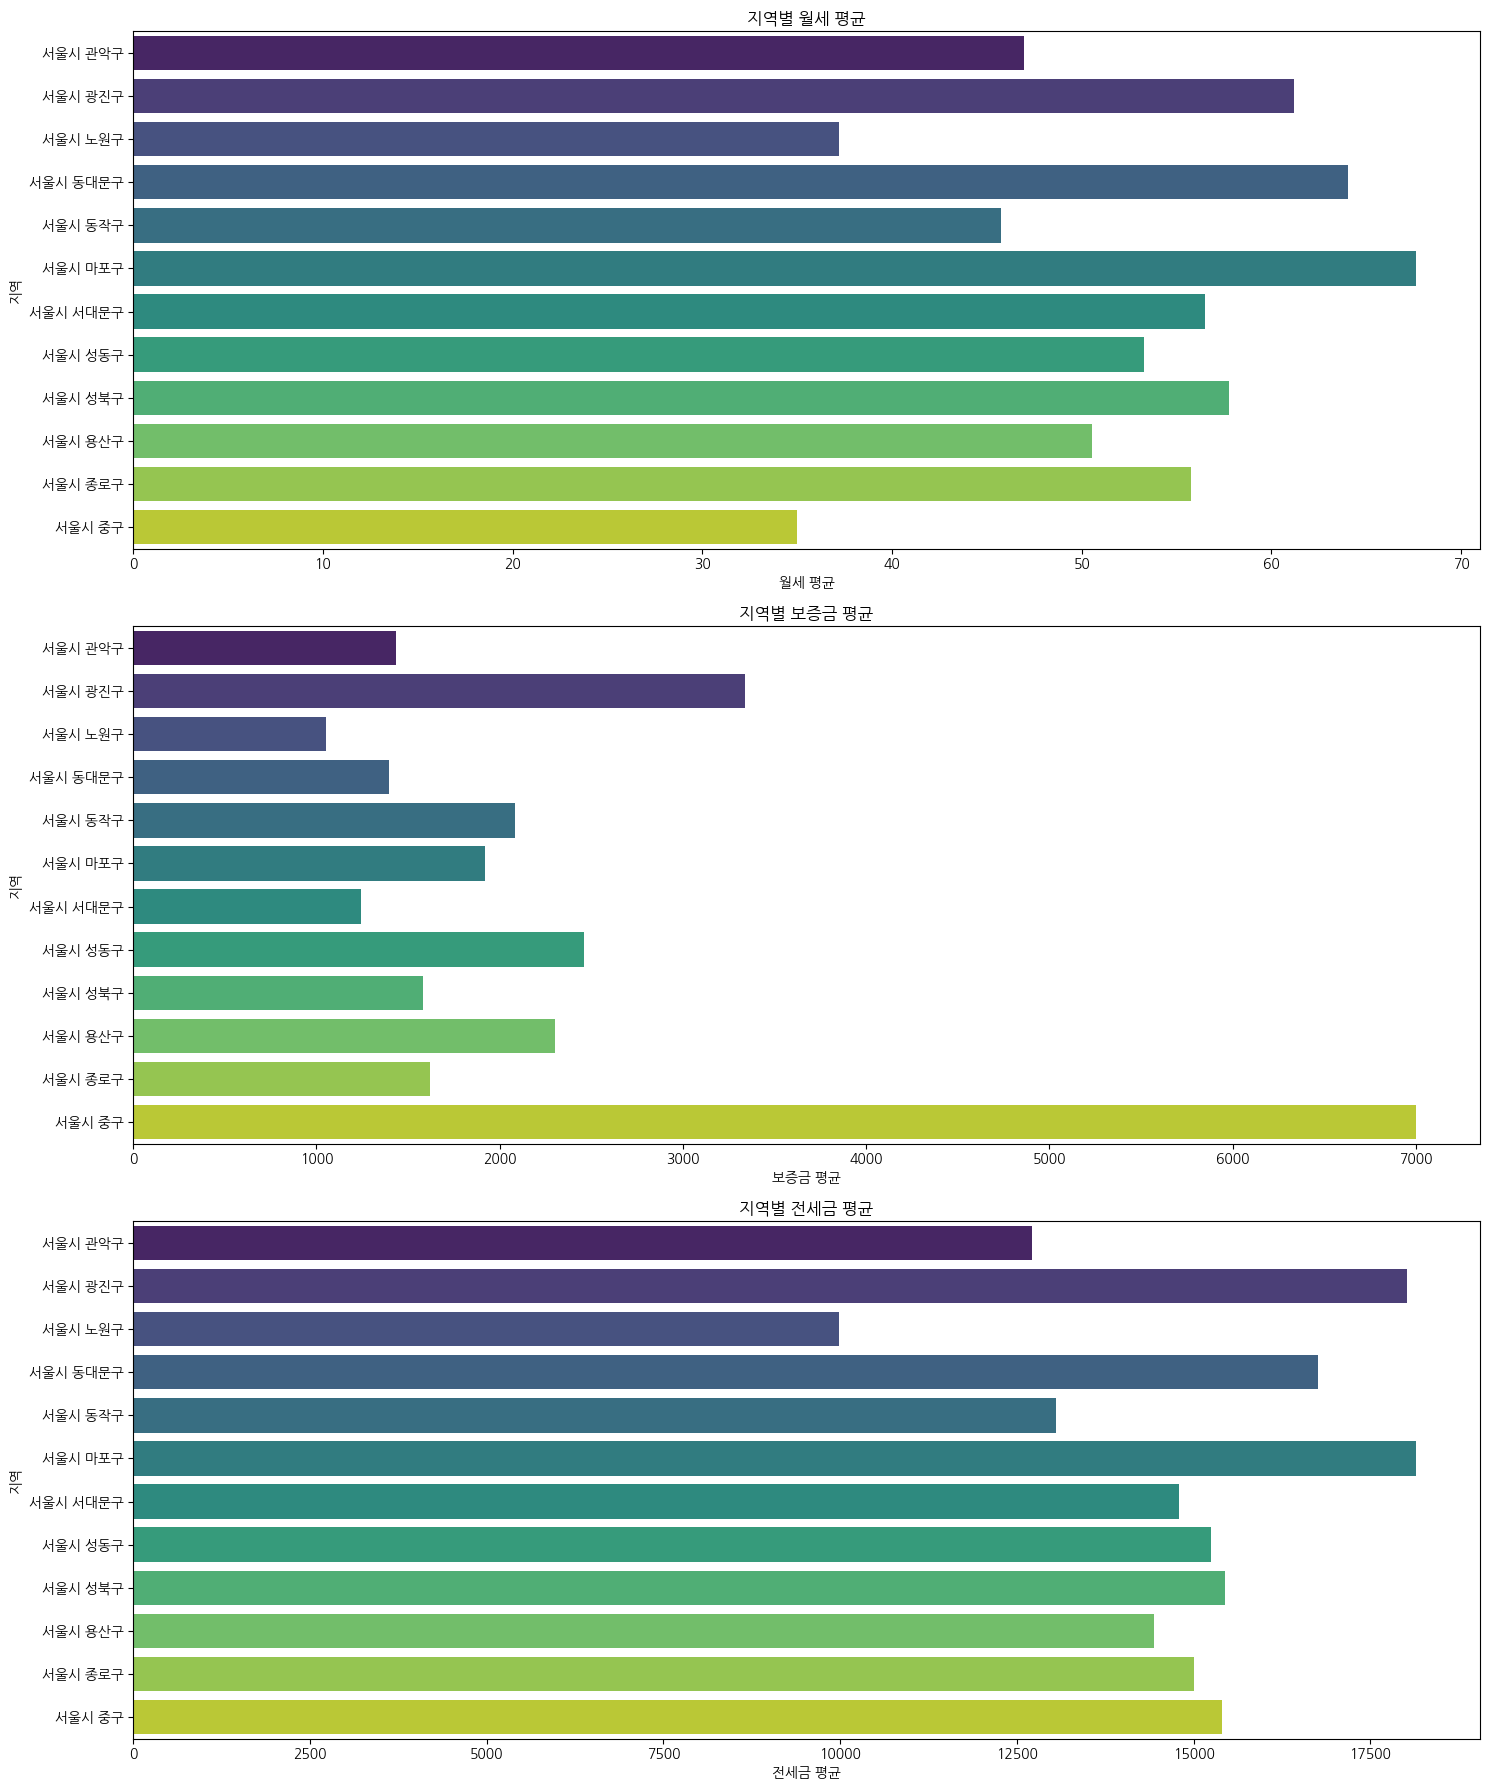

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of 월세, 보증금, 전세금 for each 지역
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))

# Plot for 월세
sns.barplot(x='월세', y='지역', data=grouped_data, ax=axes[0], palette='viridis')
axes[0].set_title('지역별 월세 평균')
axes[0].set_xlabel('월세 평균')
axes[0].set_ylabel('지역')

# Plot for 보증금
sns.barplot(x='보증금', y='지역', data=grouped_data, ax=axes[1], palette='viridis')
axes[1].set_title('지역별 보증금 평균')
axes[1].set_xlabel('보증금 평균')
axes[1].set_ylabel('지역')

# Plot for 전세금
sns.barplot(x='전세금', y='지역', data=grouped_data, ax=axes[2], palette='viridis')
axes[2].set_title('지역별 전세금 평균')
axes[2].set_xlabel('전세금 평균')
axes[2].set_ylabel('지역')

plt.tight_layout()
plt.show()


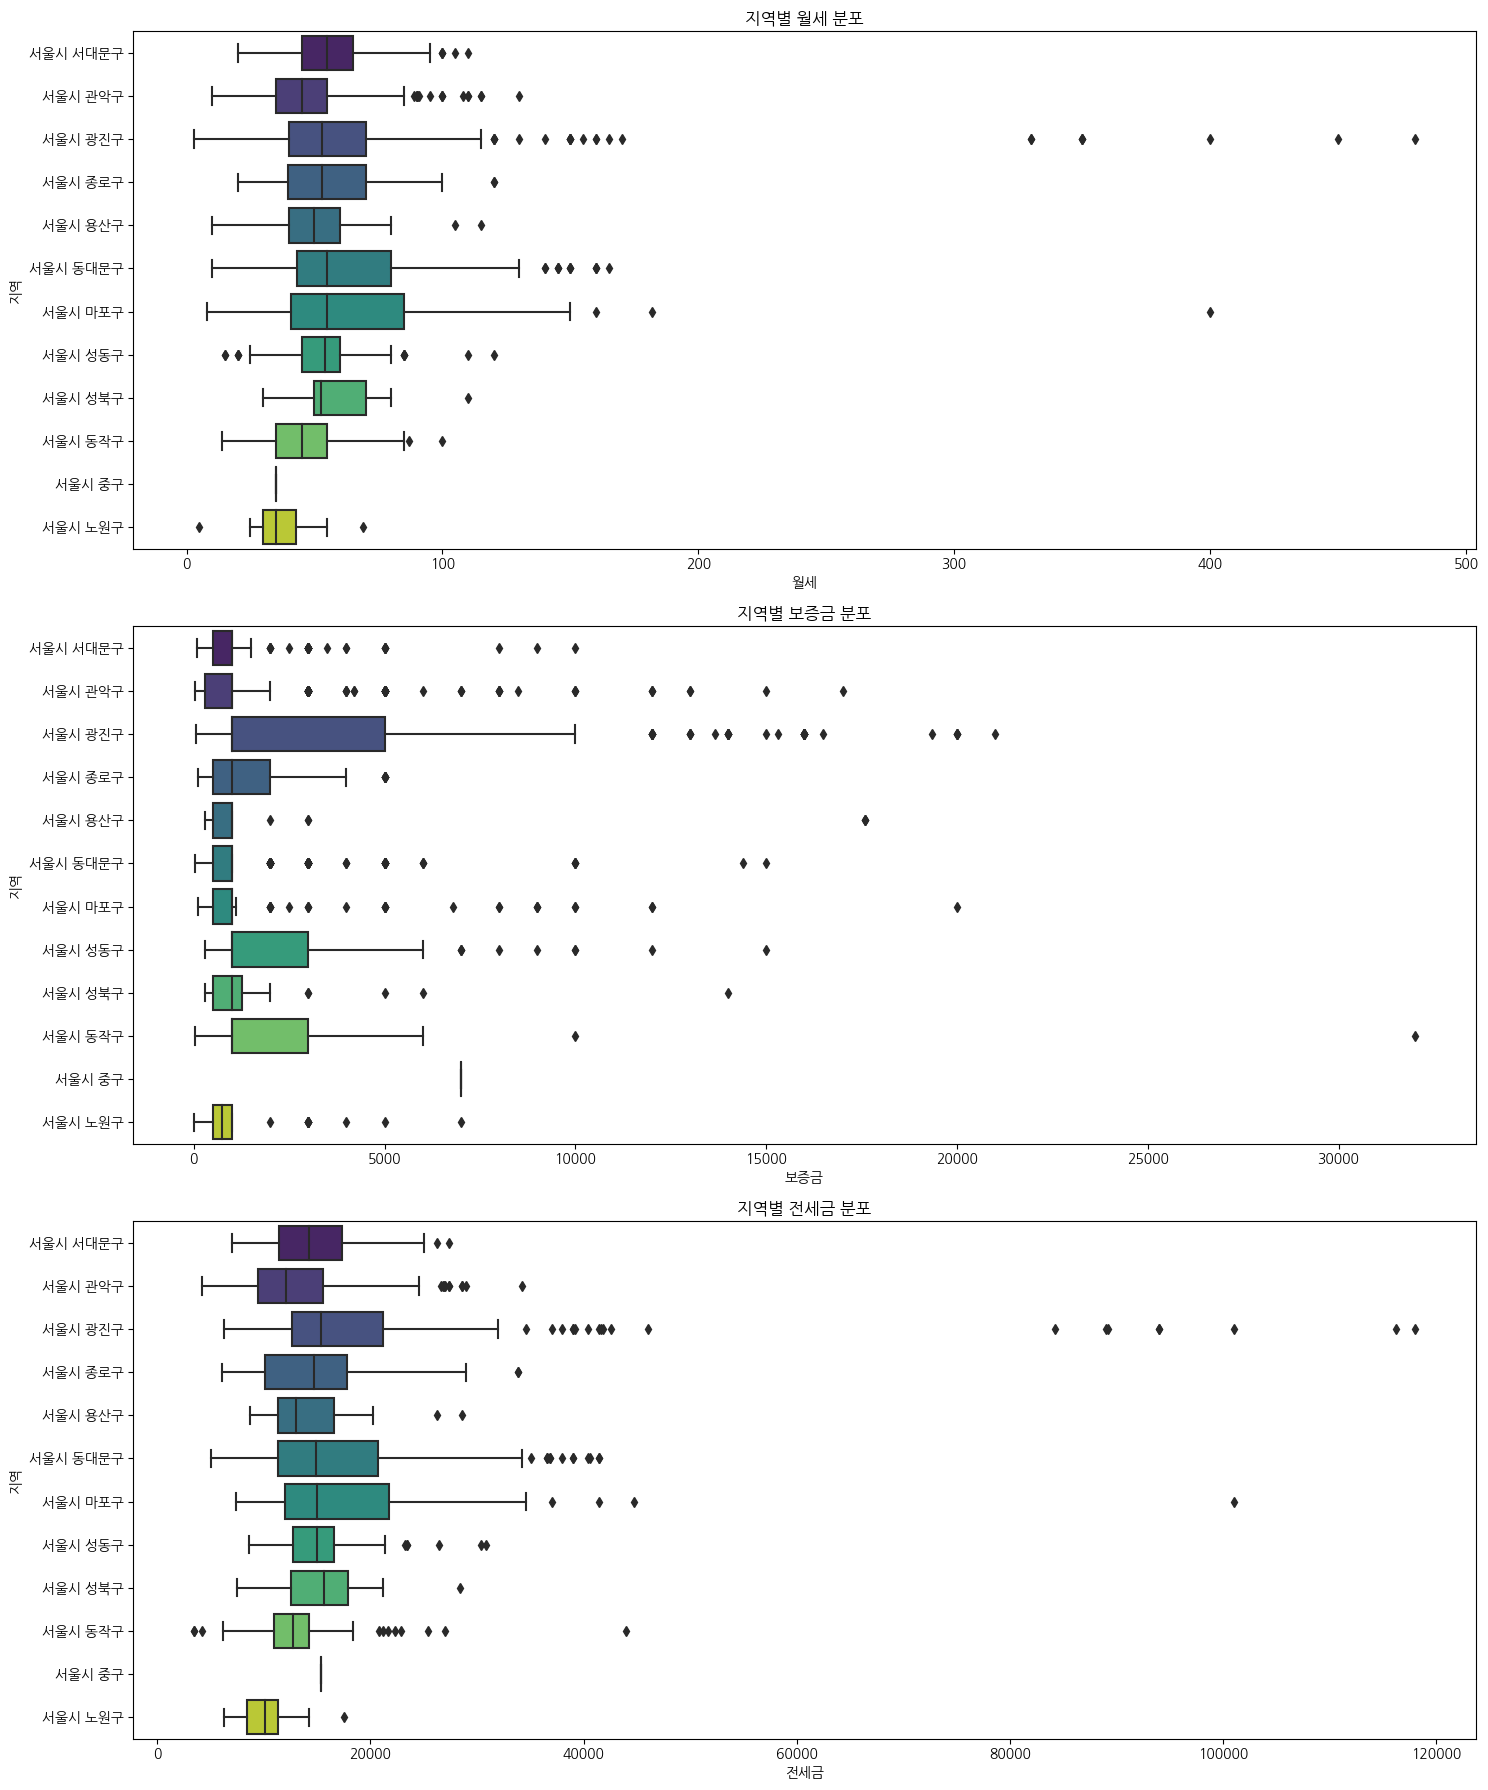

In [20]:
# Plotting the distribution of 월세, 보증금, 전세금 for each 지역 using boxplots

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))

# Boxplot for 월세
sns.boxplot(x='월세', y='지역', data=data, ax=axes[0], palette='viridis')
axes[0].set_title('지역별 월세 분포')
axes[0].set_xlabel('월세')
axes[0].set_ylabel('지역')

# Boxplot for 보증금
sns.boxplot(x='보증금', y='지역', data=data, ax=axes[1], palette='viridis')
axes[1].set_title('지역별 보증금 분포')
axes[1].set_xlabel('보증금')
axes[1].set_ylabel('지역')

# Boxplot for 전세금
sns.boxplot(x='전세금', y='지역', data=data, ax=axes[2], palette='viridis')
axes[2].set_title('지역별 전세금 분포')
axes[2].set_xlabel('전세금')
axes[2].set_ylabel('지역')

plt.tight_layout()
plt.show()


In [27]:
plt.rcParams['font.family'] = 'NanumGothic'

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

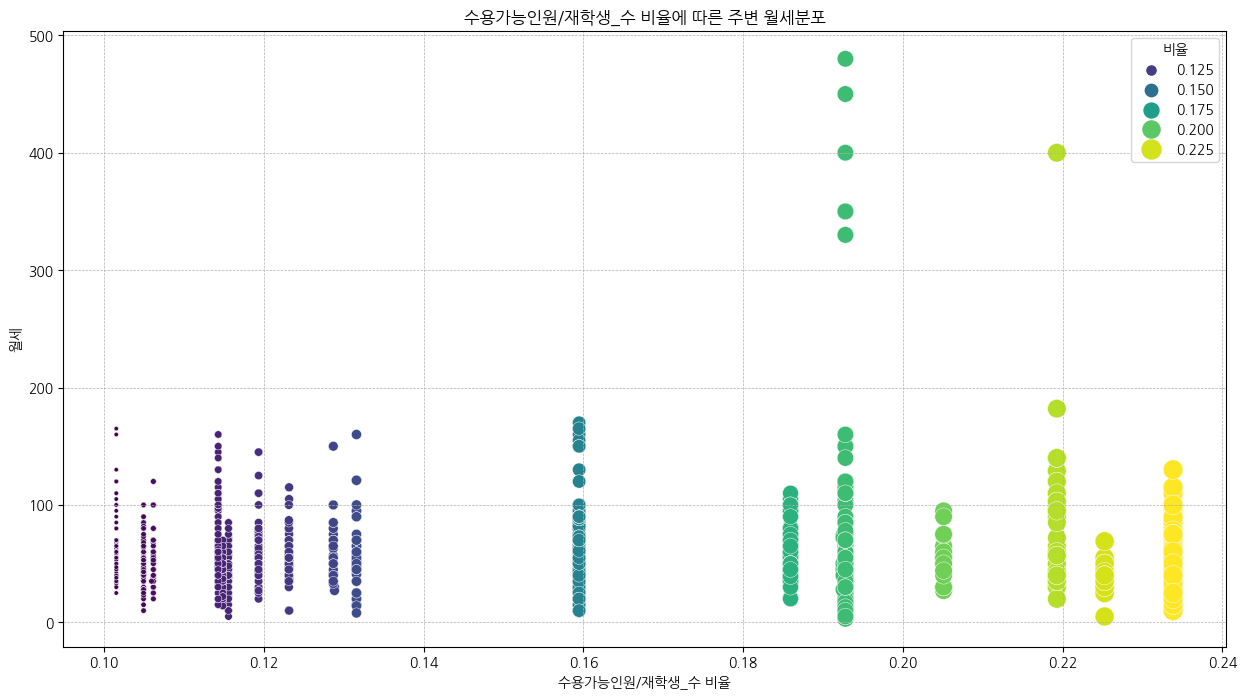

In [28]:
# Calculate the ratio of 재학생_수 to 수용가능인원
data['비율'] = data['수용가능인원'] / data['재학생_수']

# Plotting the distribution of 월세 based on the ratio
plt.figure(figsize=(15, 8))
sns.scatterplot(x='비율', y='월세', data=data, hue='비율', palette='viridis', size='비율', sizes=(10, 200))
plt.title('수용가능인원/재학생_수 비율에 따른 주변 월세분포')
plt.xlabel('수용가능인원/재학생_수 비율')
plt.ylabel('월세')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.colorbar(label='비율')
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

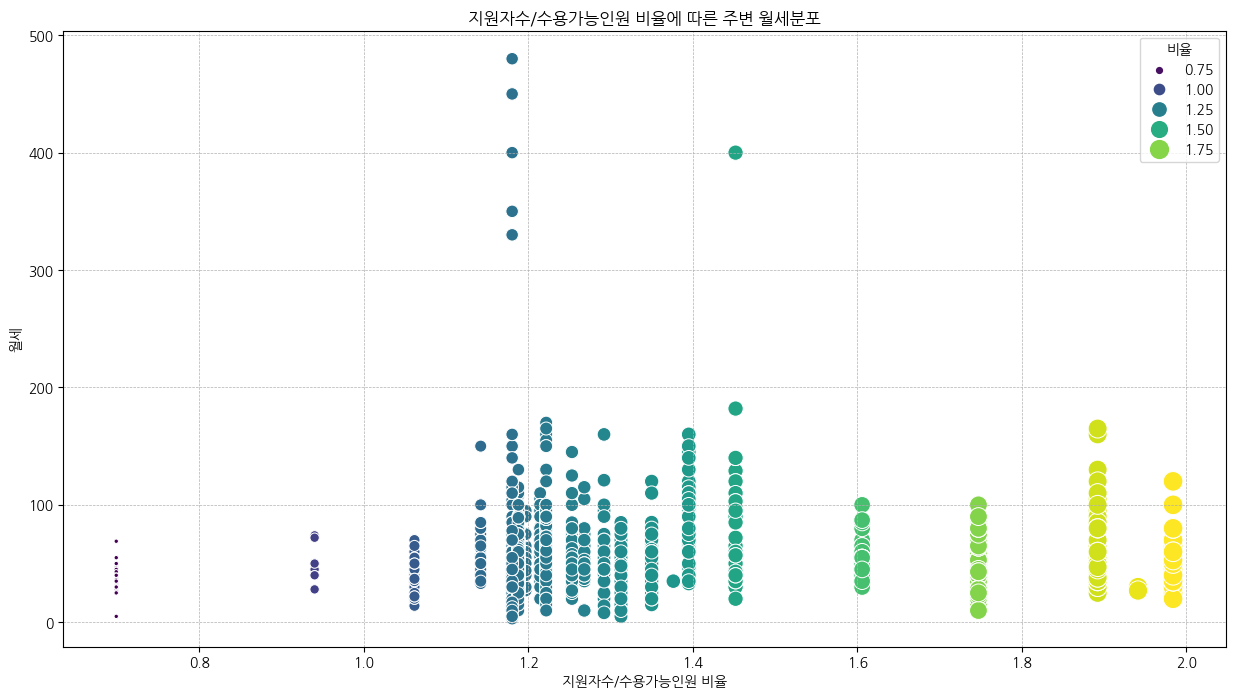

In [29]:
# Calculate the ratio of 재학생_수 to 수용가능인원
data['비율'] = data['지원자_수']/data['수용가능인원']

# Plotting the distribution of 월세 based on the ratio
plt.figure(figsize=(15, 8))
sns.scatterplot(x='비율', y='월세', data=data, hue='비율', palette='viridis', size='비율', sizes=(10, 200))
plt.title('지원자수/수용가능인원 비율에 따른 주변 월세분포')
plt.xlabel('지원자수/수용가능인원 비율')
plt.ylabel('월세')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.colorbar(label='비율')
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

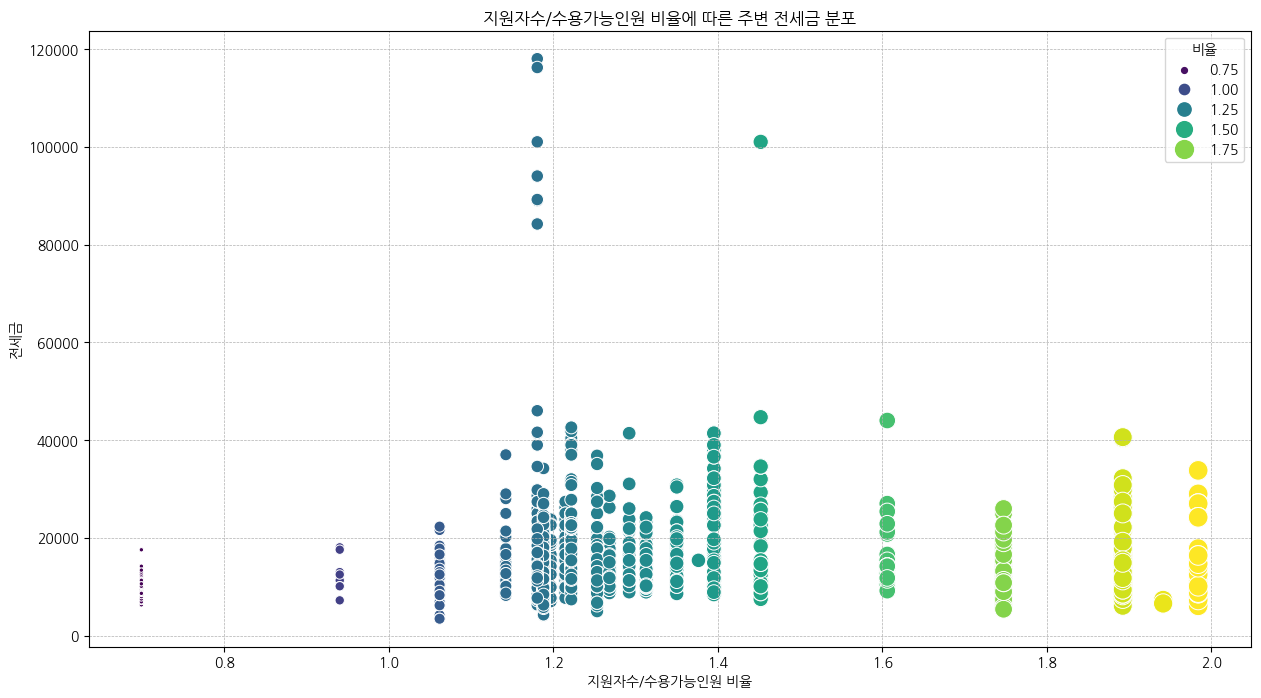

In [30]:
# Calculate the ratio of 재학생_수 to 수용가능인원
data['비율'] = data['지원자_수']/data['수용가능인원']

# Plotting the distribution of 월세 based on the ratio
plt.figure(figsize=(15, 8))
sns.scatterplot(x='비율', y='전세금', data=data, hue='비율', palette='viridis', size='비율', sizes=(10, 200))
plt.title('지원자수/수용가능인원 비율에 따른 주변 전세금 분포')
plt.xlabel('지원자수/수용가능인원 비율')
plt.ylabel('전세금')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.colorbar(label='비율')
plt.show()


findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding' not found.
findfont: Font family 'D2Coding'

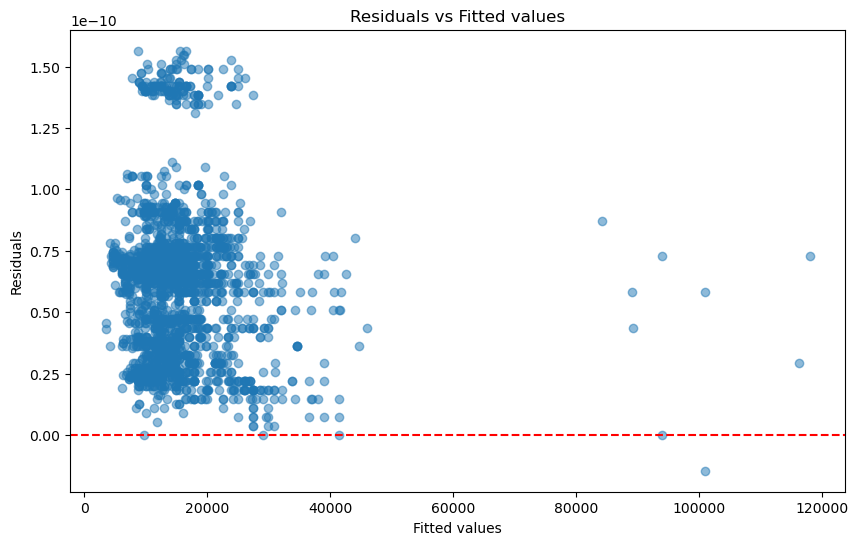

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    전세금   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.342e+30
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:01:47   Log-Likelihood:                 51370.
No. Observations:                2337   AIC:                        -1.027e+05
Df Residuals:                    2313   BIC:                        -1.026e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.41e-11   3.44e-11      0.410      0.682   -5.34e-11    8.16e-11
관리비        -1.364e-12   4.81e-13     -2.836      0.005   -2.31e-12   -4.21e-13
평수         -2.274e-13   1.96e-13     -1.162      0.245   -6.11e-13    1.56e-13
엘레베이터       6.821e-13   4.08e-12      0.167      0.867   -7.31e-12    8.67e-12
건물_층수      -1.599e-14   4.15e-13     -0.038      0.969   -8.31e-13    7.99e-13
옵션_수        3.411e-13   7.69e-13      0.443      0.657   -1.17e-12    1.85e-12
지하철역_수     -1.876e-12    5.8e-12     -0.324      0.746   -1.32e-11    9.49e-12
주차여부       -2.416e-12   3.96e-12     -0.610      0.542   -1.02e-11    5.35e-12
지하철역        5.274e-15    1.1e-14      0.480      0.632   -1.63e-14    2.68e-14
세탁소         8.438e-15   1.97e-14      0.428      0.669   -3.02e-14    4.71e-14
카페          1.421e-14   3.56e-14      0.399      0.690   -5.56e-14     8.4e-14
약국         -2.776e-15    2.1e-14     -0.132      0.895    -4.4e-14    3.84e-14
대형마트       -2.165e-15   5.14e-15     -0.421      0.674   -1.23e-14    7.92e-15
편의점        -1.554e-15   3.18e-14     -0.049      0.961    -6.4e-14    6.09e-14
버스정류장      -1.665e-15   5.61e-15     -0.297      0.767   -1.27e-14    9.33e-15
외국인_학생_수   -2.193e-15      3e-15     -0.731      0.465   -8.07e-15    3.69e-15
재학생_수      -1.735e-15      1e-15     -1.730      0.084    -3.7e-15    2.32e-16
수용가능인원     -2.984e-15   9.48e-15     -0.315      0.753   -2.16e-14    1.56e-14
지원자_수      -6.661e-16   8.27e-15     -0.081      0.936   -1.69e-14    1.56e-14
연평균_등록금    -1.166e-15   2.09e-15     -0.559      0.576   -5.26e-15    2.93e-15
기숙사비        8.882e-15   4.76e-14      0.187      0.852   -8.44e-14    1.02e-13
대학교_거리      2.132e-13   7.02e-13      0.304      0.762   -1.16e-12    1.59e-12
전세금            1.0000   2.94e-16    3.4e+15      0.000       1.000       1.000
비율          3.183e-12   2.18e-11      0.146      0.884   -3.96e-11     4.6e-11
==============================================================================
Omnibus:                      267.480   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.930
Skew:                           0.837   Prob(JB):                     2.36e-87
Kurtosis:                       4.137   Cond. No.                     8.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'D2Coding'



# Selecting numeric columns only
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Removing '전세금' from the independent variables as it's our target variable
X = data[numeric_cols].drop('전세금', axis=1)

X = data[numeric_cols].drop('보증금', axis=1)
X= X.drop(columns=['item_id']).dropna(axis=1, how='any')
X= X.drop(columns=['월세']).dropna(axis=1, how='any')
y = data['전세금']




# Adding a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Getting the residuals
residuals = model.resid

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

model.summary()